# County Elections Data

Source data:

* US Counties polygons
* Elections data from MIT Elections lab

Some Python tools that are handy for this kind of exploration: pandas, geopandas, scikit-learn.

In [2]:
%matplotlib inline

# Import libraries used below
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np
import json
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix

# Set up global display defaults 
pd.options.display.max_rows = 10 
pd. options.display.max_columns = 500

Read in county polygons

In [3]:
df_counties = gpd.read_file("./data/counties.shp")
df_counties.head()

,FID,geometry
0,05089,"POLYGON ((546.319 -323.839, 547.768 -323.798, ..."
1,06079,"POLYGON ((40.611 -280.285, 50.917 -283.160, 60..."
2,17111,"POLYGON ((609.602 -185.052, 616.170 -184.502, ..."
3,20131,"POLYGON ((486.304 -245.754, 490.183 -245.760, ..."
4,28141,"POLYGON ((628.784 -353.074, 631.733 -352.829, ..."


Set index to fips id

In [4]:
df_counties = df_counties.set_index("FID")

Read in MIT elections data and set index to fips code string

In [20]:
df_elections = pd.read_csv("./data/election-context-2018.csv")
df_elections = df_elections.dropna(axis=0, how="all")
df_elections["FID"] = df_elections["fips"].astype(int).astype(str).apply(lambda x: '{0:0>5}'.format(x))
df_elections = df_elections.set_index("FID")
df_elections.head()

,state,county,fips,trump16,clinton16,otherpres16,romney12,obama12,otherpres12,demsen16,repsen16,othersen16,demhouse16,rephouse16,otherhouse16,demgov16,repgov16,othergov16,repgov14,demgov14,othergov14,total_population,cvap,white_pct,black_pct,hispanic_pct,nonwhite_pct,foreignborn_pct,female_pct,age29andunder_pct,age65andolder_pct,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct,ruralurban_cc
FID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01001,Alabama,Autauga,1001,18172,5936,865,17379,6363,190,6331.0,18220.0,62.0,7544.0,14315.0,2258.0,NaN,NaN,NaN,9427.0,3638.0,0.0,55049.0,40690.0,75.683482,18.370906,2.572254,24.316518,1.838362,51.176225,40.037058,13.978456,53099.0,5.591657,12.417046,75.407229,10.002112,74.065601,42.002162,2.0
01003,Alabama,Baldwin,1003,72883,18458,3874,66016,18424,898,19145.0,74021.0,248.0,0.0,76995.0,1991.0,NaN,NaN,NaN,37650.0,8416.0,0.0,199510.0,151770.0,83.178788,9.225603,4.366698,16.821212,3.269510,51.194928,35.474412,18.714851,51365.0,6.286843,9.972418,70.452889,7.842227,68.405607,42.279099,3.0
01005,Alabama,Barbour,1005,5454,4871,144,5550,5912,47,4777.0,5436.0,16.0,5297.0,4286.0,463.0,NaN,NaN,NaN,3111.0,3651.0,0.0,26614.0,20375.0,45.885624,47.888329,4.309762,54.114376,2.859397,46.498084,37.664387,16.528895,33956.0,12.824738,26.235928,87.132213,19.579752,81.364746,67.789635,6.0
01007,Alabama,Bibb,1007,6738,1874,207,6132,2202,86,2082.0,6612.0,17.0,1971.0,6670.0,15.0,NaN,NaN,NaN,3525.0,1368.0,0.0,22572.0,17590.0,74.765196,21.212121,2.223994,25.234804,1.351232,46.464646,37.329435,14.885699,39776.0,7.146827,19.301587,88.000000,15.020490,87.471774,68.352607,1.0
01009,Alabama,Blount,1009,22859,2156,573,20757,2970,279,2980.0,22169.0,48.0,2390.0,22367.0,47.0,NaN,NaN,NaN,12074.0,2178.0,0.0,57704.0,42430.0,87.657701,1.557951,8.727298,12.342299,4.271801,50.485235,37.240053,17.192916,46212.0,5.953833,19.968585,86.950243,16.643368,86.163610,89.951502,1.0


Join data to polygons

Join data to polygons and calculate variable of interest.

In [6]:
df_merged = df_counties.join(df_elections)
df_merged["party_ratio"] = df_merged["trump16"] / (df_merged["trump16"] + df_merged["clinton16"]) * 1000
df_merged.head()

,geometry,state,county,fips,trump16,clinton16,otherpres16,romney12,obama12,otherpres12,demsen16,repsen16,othersen16,demhouse16,rephouse16,otherhouse16,demgov16,repgov16,othergov16,repgov14,demgov14,othergov14,total_population,cvap,white_pct,black_pct,hispanic_pct,nonwhite_pct,foreignborn_pct,female_pct,age29andunder_pct,age65andolder_pct,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct,ruralurban_cc,party_ratio
FID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
05089,"POLYGON ((546.319 -323.839, 547.768 -323.798, ...",Arkansas,Marion,5089.0,5336.0,1434.0,337.0,4774.0,2037.0,240.0,1320.0,5265.0,382.0,0.0,5601.0,1170.0,NaN,NaN,NaN,3278.0,1621.0,260.0,16404.0,13450.0,94.867106,0.359668,2.097050,5.132894,1.152158,50.591319,28.371129,26.487442,33726.0,10.049505,14.012637,84.683676,13.835902,84.389838,100.000000,9.0,788.183161
06079,"POLYGON ((40.611 -280.285, 50.917 -283.160, 60...",California,San Luis Obispo,6079.0,56164.0,67107.0,11738.0,59967.0,61258.0,4413.0,106645.0,0.0,0.0,64718.0,68710.0,0.0,NaN,NaN,NaN,36942.0,44101.0,0.0,278680.0,213215.0,69.686020,1.861633,21.922994,30.313980,10.435984,49.199081,39.426582,17.555619,64014.0,5.505823,9.876048,65.941034,4.038070,61.033203,16.596387,2.0,455.614054
17111,"POLYGON ((609.602 -185.052, 616.170 -184.502, ...",Illinois,McHenry,17111.0,71612.0,60803.0,9335.0,71598.0,59797.0,2449.0,58815.0,72296.0,10492.0,55053.0,84088.0,0.0,NaN,NaN,NaN,61459.0,28919.0,3003.0,307083.0,217245.0,82.323020,1.224099,12.285604,17.676980,9.252873,50.185780,38.695076,12.158602,79836.0,6.535300,7.387894,66.753496,4.608907,65.742109,9.878546,1.0,540.814862
20131,"POLYGON ((486.304 -245.754, 490.183 -245.760, ...",Kansas,Nemaha,20131.0,4124.0,725.0,273.0,3930.0,1000.0,96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2580.0,1427.0,143.0,10177.0,7500.0,95.764960,0.609217,1.601651,4.235040,1.120173,49.965609,38.262749,20.064852,50400.0,1.793722,8.519781,78.218995,8.470948,77.935780,75.240715,6.0,850.484636
28141,"POLYGON ((628.784 -353.074, 631.733 -352.829, ...",Mississippi,Tishomingo,28141.0,7166.0,999.0,206.0,6133.0,1643.0,160.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19503.0,14895.0,93.580475,2.409886,2.748295,6.419525,1.620264,51.489514,35.189458,19.494437,35364.0,10.015844,21.472527,89.128205,21.330633,89.077594,100.000000,8.0,877.648500


Delete nulls

In [7]:
# creating bool series True for NaN values  
bool_series = pd.isnull(df_merged["county"])  
    
# Drop nulls
df_merged[bool_series]  
df_merged = df_merged.drop(df_merged[bool_series==True].index)

Save out shape file in case we want to look at it in qgis

In [8]:
df_merged.to_file("./data/county_elections.shp")

Plot it to get a look at what is going on

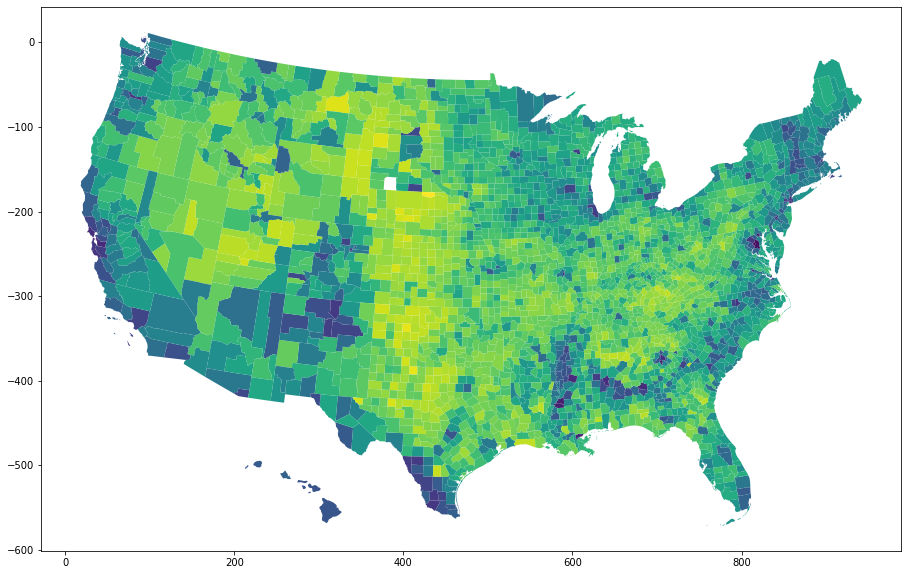

In [10]:
plt.rcParams['figure.figsize'] = [20, 10]
df_merged.plot(column="party_ratio")

Explore possible predictors

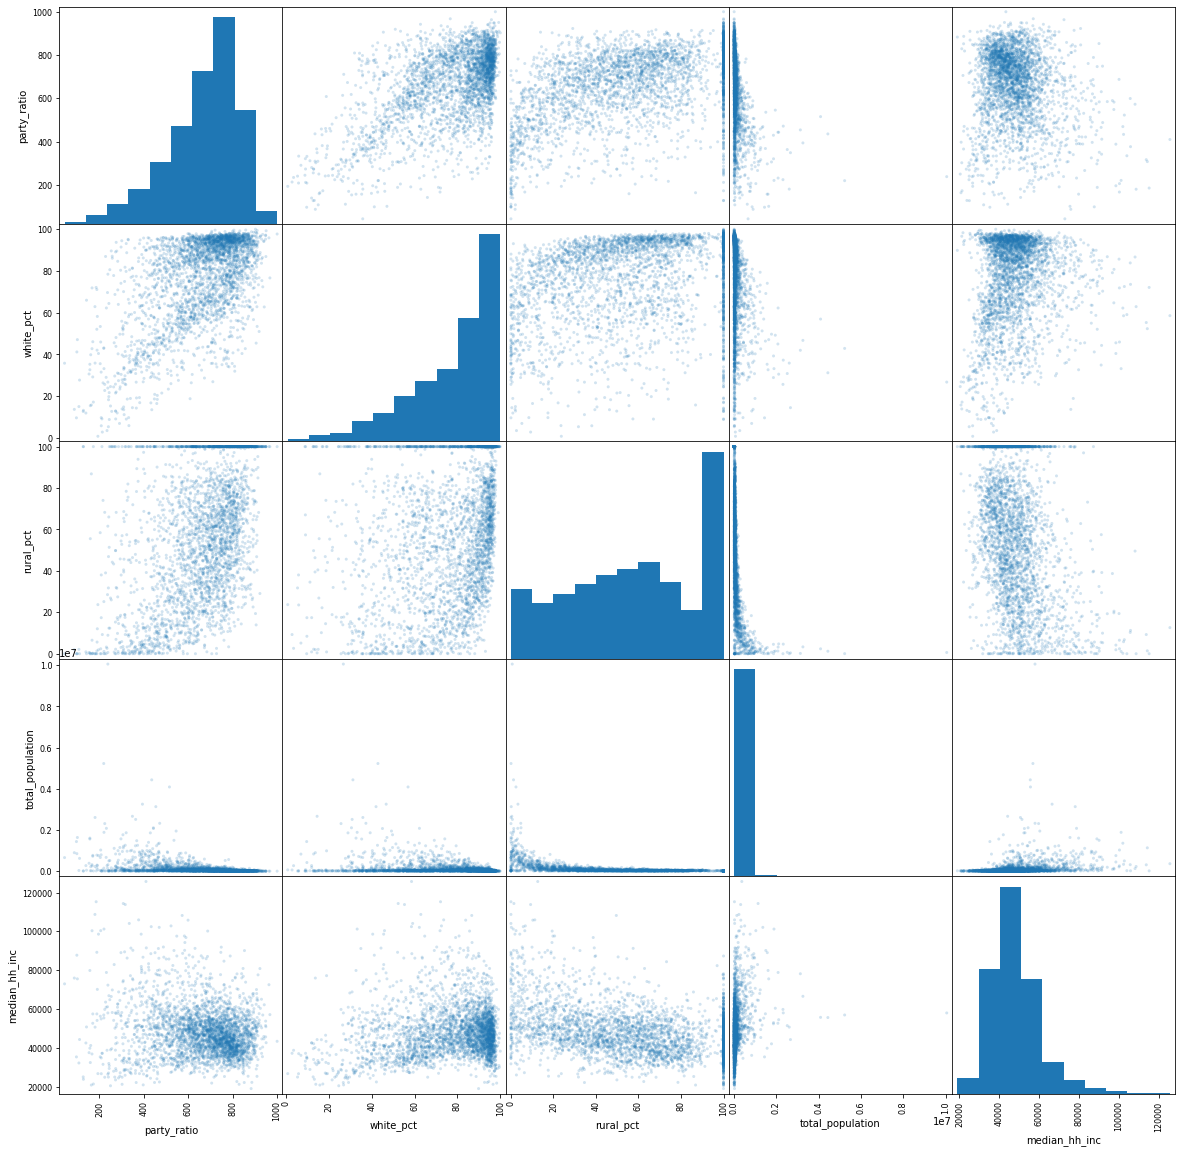

In [11]:
scatter_df = df_merged[["party_ratio", "white_pct", "rural_pct", 
                        "total_population", "median_hh_inc"]]
plt.rcParams['figure.figsize'] = [20, 20]
scatter_matrix(scatter_df, alpha=0.2)
plt.show()

Create regression model

In [12]:
X = df_merged[["white_pct", 'rural_pct', 'total_population', 'median_hh_inc']]
y = df_merged["party_ratio"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [14]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

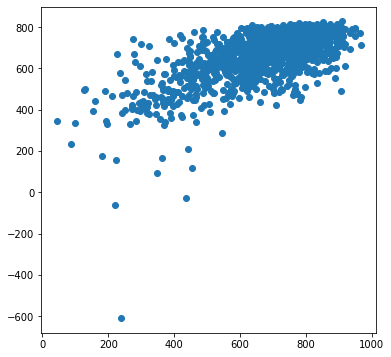

In [15]:
predictions = lm.predict(X_test)
plt.figure(figsize=(6, 6))
plt.scatter(y_test,predictions)
plt.show()

Plot residuals - any clues as to the problem?

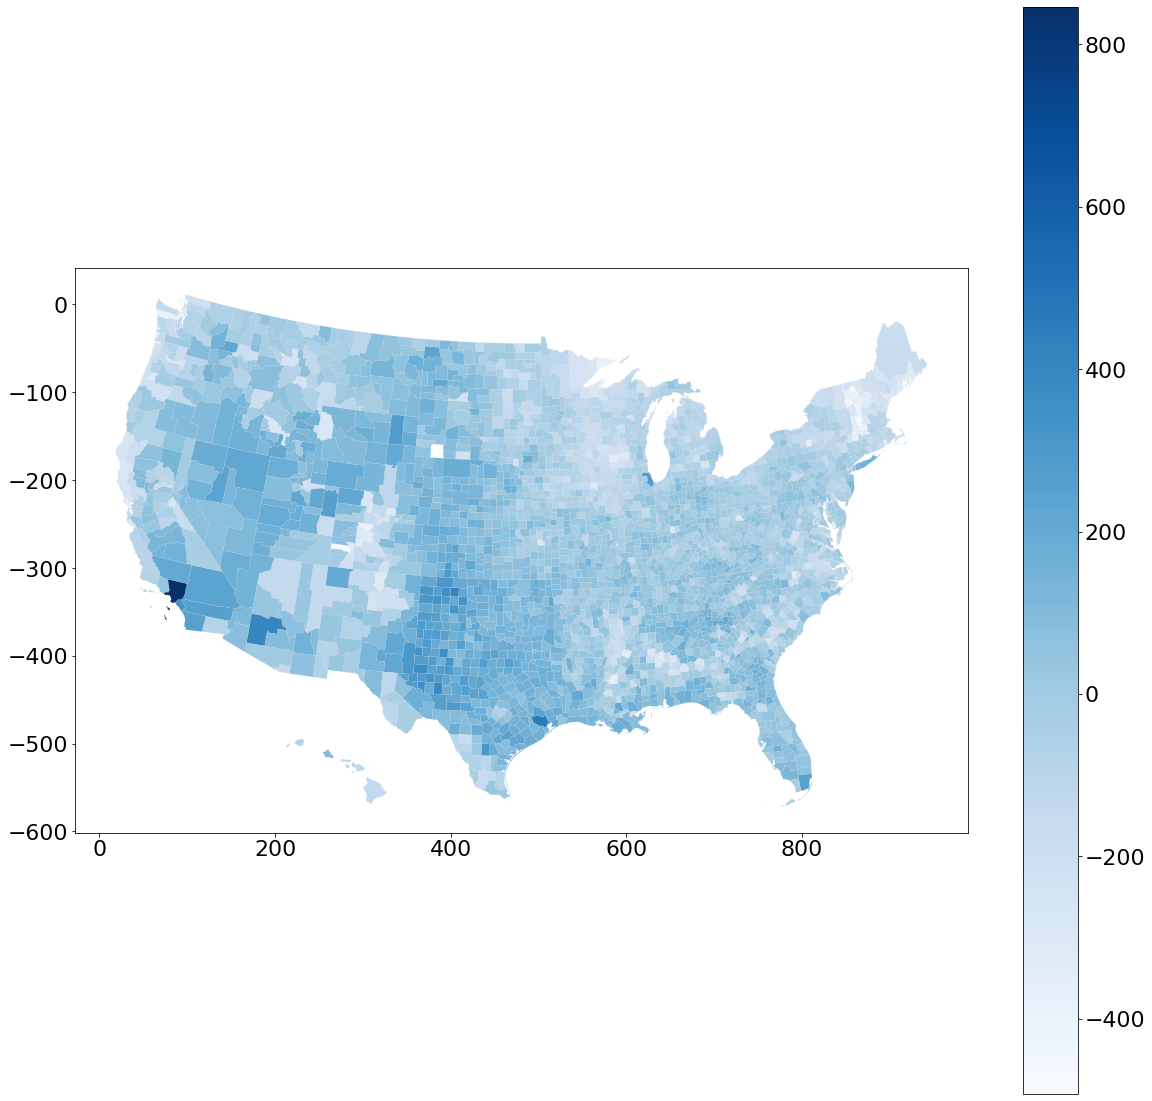

In [16]:
plt.rcParams.update({'font.size': 22})
df_merged["predicted"] = lm.predict(X)
df_merged["residuals"] = df_merged["party_ratio"] - df_merged["predicted"] 
df_merged.plot(column="residuals", cmap="Blues", linewidth=0.1, edgecolor="0.8", legend=True)

https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9